## Define
For this project, we will build a model that will predict salaries based on the job description. This will be a supervised learning problem because we are given the correct outcome which is salaries. The model we will be building will be an regression model; since salaries are continuous.

In [55]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

## Discover

In [56]:
#Load data
test = pd.read_csv('data/test_features.csv')
train_features = pd.read_csv('data/train_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')

In [57]:
#View the data
test.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [58]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [59]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [60]:
#combine train and train_salaries
train = pd.merge(train_features, train_salaries)
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [61]:
#Examine the data to check length and dtypes
combineDataSet = [train, test]

for data in combineDataSet:
    print (data.info())
    print ('-'*50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry        

- All of the features seem to be in correct datatype and there are no missing values.<br />

In [62]:
#Describe numerical and object variables
train.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


- Some people have salary of $0.00, which is strange. We will look into it feather becasue there might be missing values.<br />
- Minimum value for yearsExprience and milesFromMetropolis are 0, but prehalfs some people have few months of experience and some people live in the metropolis. 

In [63]:
train.describe(include=object)

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684625000,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


- All of the values in colume(jobid) are unique, so I don't think it will help us.
- The rest of the columns are basically categories. 

In [64]:
#Identify numerical, categorical, and target variables
numerical = ['yearsExperience', 'milesFromMetropolis']
categorical = ['companyId', 'jobType', 'degree', 'major', 'industry'] 
target = 'salary'

- The jobId field would be an continues variable.  

#### Clean data

In [65]:
#Get rid of any duplicate rows
for data in combineDataSet:
    data.drop_duplicates(inplace=True)

In [66]:
#look into salaries that are $0.00
train['salary'].value_counts(sort=False).head()

0      5
17     1
18     3
19    10
20    43
Name: salary, dtype: int64

In [67]:
train[train['salary'] == 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


So it turns out, there are 5 people has salary of 0 dollars. One of them is a manager with doctoral degree and other is vice president with masters degree. We know for sure that two cannot make $0. Therefore, we will conclue that there might be some kind of error and we will drop those rows.  

In [68]:
train = train[train['salary'] != 0]
train.shape

(999995, 9)

- After dropping 5 rows, we now have 999,995 compare to before 100,000.

#### Exploratory Data Analysis

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


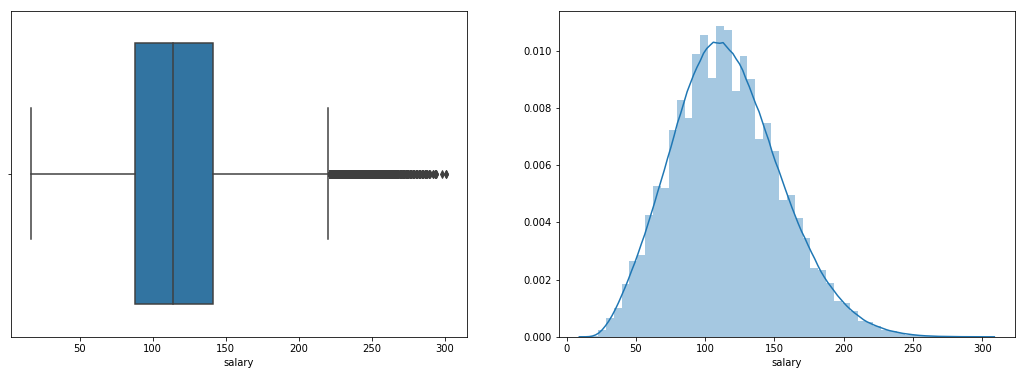

In [69]:
#Visualize the Target variable
plt.figure(figsize = (18, 6))
plt.subplot(1,2,1)
sns.boxplot(train.salary)
plt.subplot(1,2,2)
sns.distplot(train.salary)
plt.show()

- We can see by looking at the box plot that there are potential outliers.
- The data is also well distributed.

In [70]:
#Identify potential outliers
stat = train.salary.describe()
print (stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print ('-'*30)
print ('The upper and lower bounds for potential outliers are {} and {}.'.format(upper, lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
------------------------------
The upper and lower bounds for potential outliers are 220.5 and 8.5.


- Basically, anything below 8.5 and above 220.5 can be an outliers. 

In [71]:
#View potential outlier below lower bound
train[train['salary'] < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


- There are no outliers below 8.5 just like the box plot showed.

In [72]:
#View potential outlier above upper bound
train[train['salary'] > 220.5].jobType.value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

- Most of the people with salary above 220.5 are upper level positions.
- Let's feature look into junior and senior position.

In [73]:
train[(train['salary'] > 220.5) & ((train['jobType'] == 'JUNIOR') | (train['jobType'] == 'SENIOR'))]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
23150,JOB1362684430837,COMP23,SENIOR,MASTERS,MATH,WEB,24,5,239
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
27880,JOB1362684435567,COMP60,SENIOR,MASTERS,ENGINEERING,WEB,20,10,225
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
60439,JOB1362684468126,COMP46,SENIOR,DOCTORAL,ENGINEERING,OIL,19,41,225
79242,JOB1362684486929,COMP5,SENIOR,DOCTORAL,BUSINESS,FINANCE,21,29,243
94729,JOB1362684502416,COMP3,SENIOR,MASTERS,ENGINEERING,WEB,22,0,227
95353,JOB1362684503040,COMP22,SENIOR,DOCTORAL,MATH,FINANCE,24,12,232
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248


- They all have at least more than 15 years of experience and have higher degree.
- Also maybe the industry(oil, web, finance) they work for pays good amount of salary.
- Therefore, we can conclude that those outliers above 220.5(salary) are valid and we will not get rid of them.

In [74]:
#Plot and examine every feature
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

In [75]:
train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


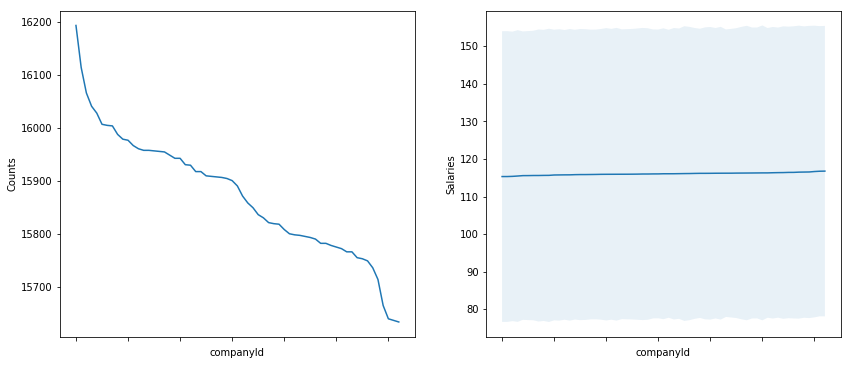

In [76]:
plot_feature(train, 'companyId')

- The companyId plays no role in determining someone's salary. 

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


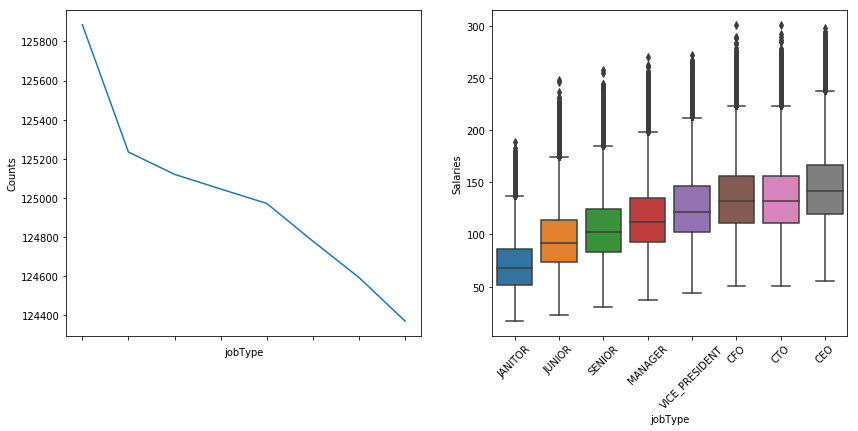

In [77]:
plot_feature(train, 'jobType')

- The jobType and salaries have a linear relationship becasue the higher the position(jobType), the higher the salary.
- They have positive relationship. 

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


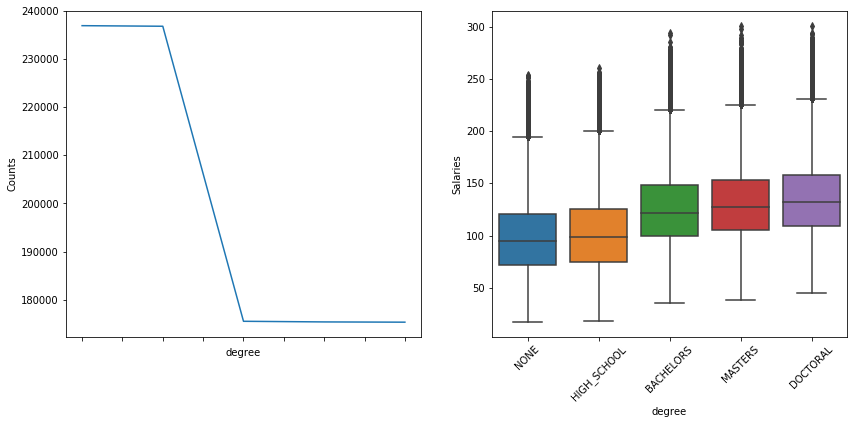

In [78]:
plot_feature(train, 'degree')

- Exact same thing between degree and salaries.
- The degree and salaries have a linear relationship becasue the higher the degree, the higher the salary.
- They have positive relationship. 

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


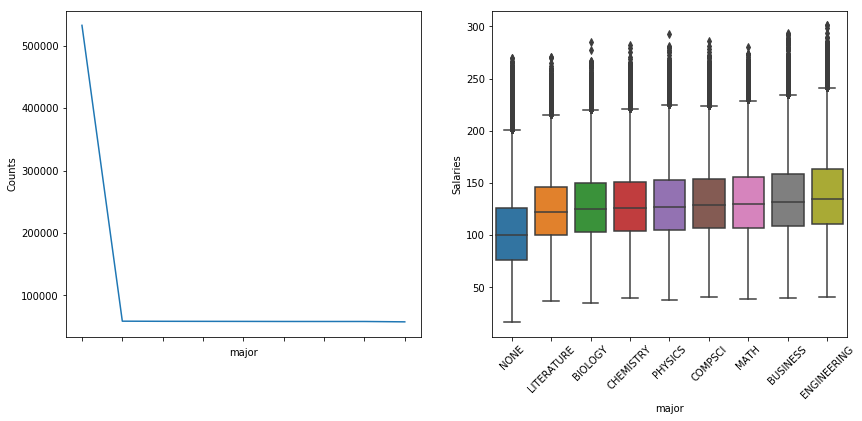

In [79]:
plot_feature(train, 'major')

- It looks like if you have any kind of major, you will be making almost the same amount with the exception of having no major.
- Top 3 majors that make the most amount of salaries are math, business, and engineering.

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


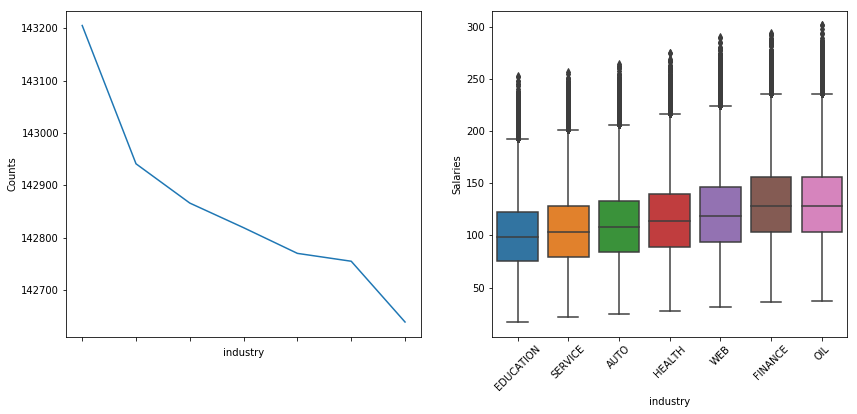

In [80]:
plot_feature(train, 'industry')

- Top 3 industries that make the most amount of salaries are web, finance, and oil with education, service, and auto being the least.
- This proves why the outliers above 220.5(salaries) were from industries of web, finance, and oil.
- I believe we make the correct decision by keeping those values(rows).

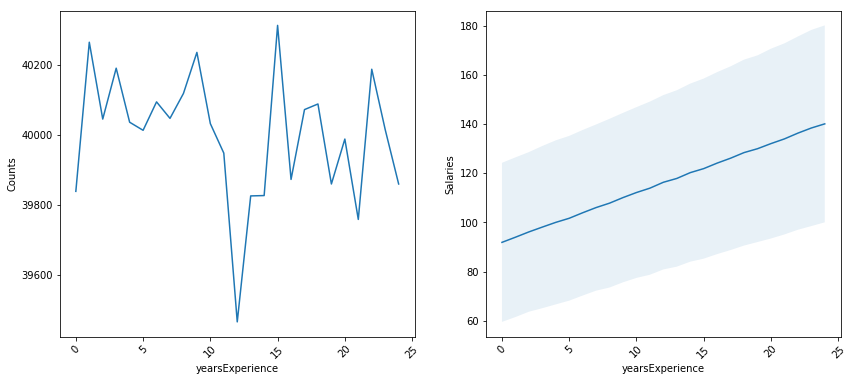

In [81]:
plot_feature(train, 'yearsExperience')

- The more experience the higher the salary.
- The yearsExperience and salaries have a linear relationship. 

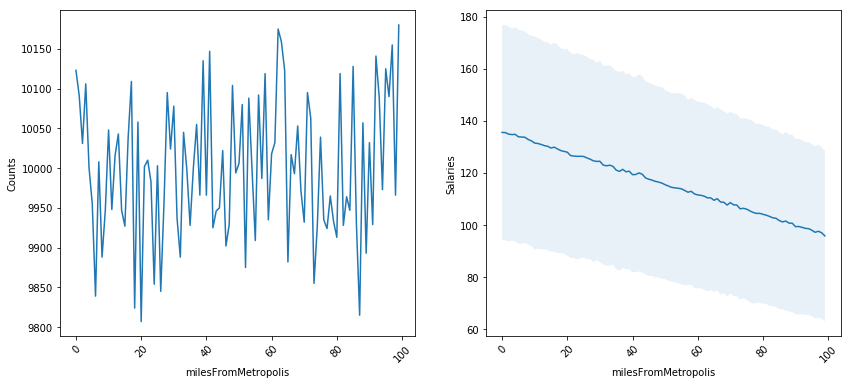

In [82]:
plot_feature(train, 'milesFromMetropolis')

- Surprisingly, milesFromMetropolis and salaries have a negative relationship.

In [83]:
#Check for correlations between features

## Develop

In [84]:
#Import libaries for creating a model
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [85]:
#Helper functions 

def encode_features(df, categorical_vars=None, numerical_vars=None):
    '''.....'''
    categorical_df = pd.get_dummies(df[categorical_vars])
    numerical_df = df[numerical_vars]
    return pd.concat([categorical_df, numerical_df], axis=1)

def get_target(df, target_var):
    '''Returns a target variable as a dataframe'''
    return pd.DataFrame(df[target_var])

def train_model(model, features, target, mean_mse, cv_std):
    neg_mse = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error', n_jobs=2)
    mean_mse[model] = -1.0*neg_mse.mean()
    cv_std[model] = neg_mse.std()
    
def print_summary(model, mean_mse, cv_std):
    print ('\nModel:\n', model)
    print ('Average MSE:\n', mean_mse[model])
    print ('Standard deviation during CV:\n', cv_std[model])
    print ('-'*80)

def save_results(model, mean_mse, predictions, feature_importances):
    with open('model.txt',  'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv')
    np.savetxt('predictions.csv', predictions, delimiter=',')

#### Features Engineering

In [86]:
#Define variables as categorical, numeric, and target to be used in the model 
print (categorical)
print (numerical)
print (target)
categorical_variables = ['companyId', 'jobType', 'degree', 'major', 'industry']
numerical_variables = ['yearsExperience', 'milesFromMetropolis']
target_variable = 'salary'

['companyId', 'jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis']
salary


In [87]:
#Shuffle the data to imporve cross-validation accuracy
shuffle_train = shuffle(train)

In [88]:
#Encode categorical variables with a number
print ('Encoding data...')
features_df = encode_features(shuffle_train, categorical_vars=categorical_variables, numerical_vars=numerical_variables)
test_df = encode_features(test, categorical_vars=categorical_variables, numerical_vars=numerical_variables)

Encoding data...


In [89]:
#Get the target variables as a dataframe
target_df = get_target(shuffle_train, target_variable)

#### Create models

In [90]:
#Instantiate the models and add them as a list
models = []

lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

models.extend([lr, rfr, gbr])

#### Test models

In [91]:
#Perform cross-validation and train the models 
print ('Beginning cross validation for baseline models...')
mean_mse = {}
cv_std = {}

for model in models:
    train_model(model, features_df, target_df, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Beginning cross validation for baseline models...

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Average MSE:
 384.43812194239484
Standard deviation during CV:
 0.9592614347876907
--------------------------------------------------------------------------------

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Average MSE:
 429.8632688353041
Standard deviation during CV:
 1.3247406100037042
--------------------------------------------------------------------------------

Model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', 

#### Select best model

In [92]:
#Choose the best model
model = min(mean_mse, key=mean_mse.get)
print ('\nPredictions calculated using model with lowest MSE:')
print (model)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [93]:
#Train the model on entire dataset
model.fit(features_df, target_df)

C:\Users\Miraj-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
#Make predictions based on test set
predictions = model.predict(test_df)

In [95]:
#Get feature importances if the model has the attribute 
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    importances = [0]*len(features_df.columns)

feature_importances = pd.DataFrame({'features':features_df.columns, 'importances':importances})
feature_importances.sort_values(by='importances', ascending=False, inplace=True)
feature_importances.set_index('features', inplace=True)

## Deploy

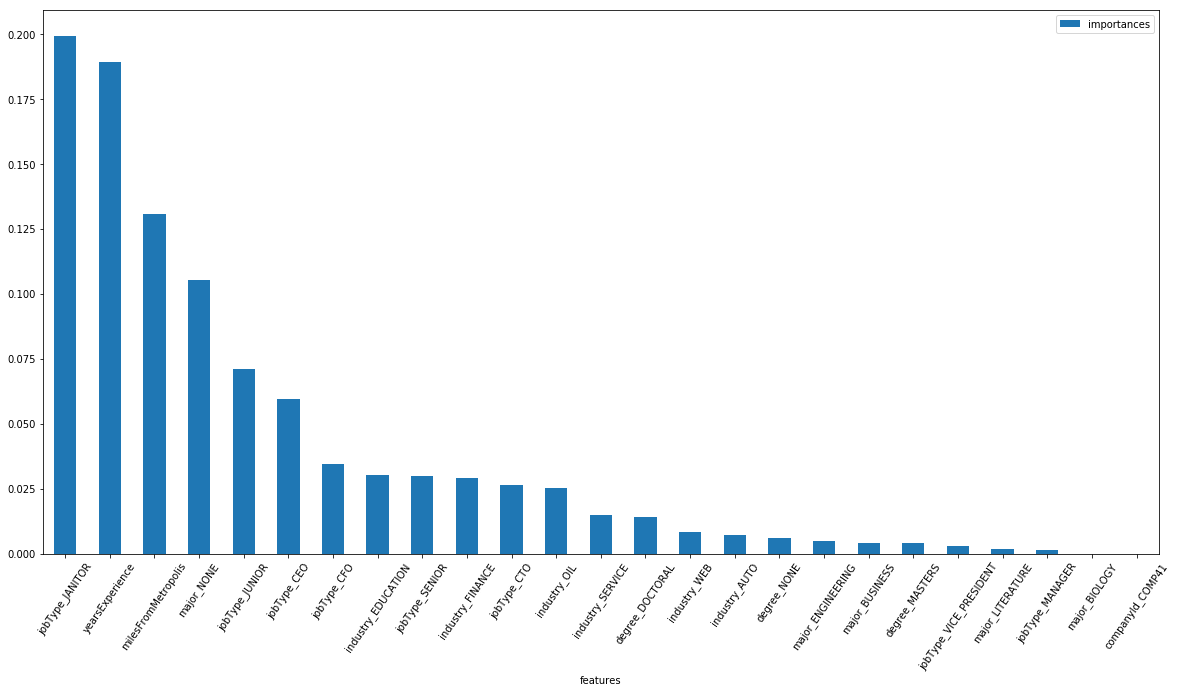

In [96]:
#Save/print feature importances
save_results(model, mean_mse[model], predictions, feature_importances)

feature_importances[0:25].plot.bar(figsize=(20,10), rot=55)
plt.show()